<a href="https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/MMClassification_python_cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 基于 Colab 的 MMClassification Python 教程

在本教程中会介绍如下内容：

* 如何安装 MMCls
* 如何基于预训练模型进行推理计算
* 如何基于预训练模型进行模型微调 

## 安装 MMClassification

在使用 MMClassification 之前，我们需要配置环境，步骤如下：

- 安装 Python, CUDA, C/C++ compiler 和 git
- 安装 PyTorch (CUDA 版)
- 安装 mmcv
- 克隆 mmcls github 代码库然后安装

因为我们在 Google Colab 进行实验，Colab 已经帮我们完成了基本的配置，我们可以直接跳过前面两个步骤 。

### 检查环境

In [1]:
%cd /content

/content


In [2]:
!pwd

/content


In [3]:
# 检查 nvcc 版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# 检查 GCC 版本
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# 检查 PyTorch 的安装情况
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu102
True


### 安装 MMCV

MMCV 是 OpenMMLab 代码库的基础库。Linux 环境的安装 whl 包已经提前打包好，大家可以直接下载安装。

需要注意 PyTorch 和 CUDA 版本，确保能够正常安装。

在前面的步骤中，我们输出了环境中 CUDA 和 PyTorch 的版本，分别是 11.0 和 1.9.0，我们需要选择相应的 MMCV 版本。

另外，也可以安装完整版的 MMCV-full，它包含所有的特性以及丰富的开箱即用的 CUDA 算子。需要注意的是完整版本可能需要更长时间来编译。

In [6]:
# 安装 mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.9.0/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.9.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.9.0/index.html
     |████████████████████████████████| 313 kB 7.8 MB/s 
     |████████████████████████████████| 185 kB 13.6 MB/s 
  Created wheel for mmcv: filename=mmcv-1.3.9-py2.py3-none-any.whl size=451832 sha256=21838bb360585d5fb846ab545d87b70c262e22bcf79c680ab48bfc922ab5b5b3
  Stored in directory: /root/.cache/pip/wheels/88/48/bf/655e136aea5534d7a9a85fe247fee7957178fc19cf79dda602
Successfully built mmcv


### 克隆并安装 MMCls

接着，我们从 github 上克隆下 mmcls 最新代码库并进行安装。

In [7]:
# 下载 mmcls 代码库
!git clone https://github.com/open-mmlab/mmclassification.git

Cloning into 'mmclassification'...
remote: Enumerating objects: 3161, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 3161 (delta 2), reused 5 (delta 0), pack-reused 3149
Receiving objects: 100% (3161/3161), 2.81 MiB | 29.39 MiB/s, done.
Resolving deltas: 100% (2039/2039), done.


In [8]:
%cd mmclassification/

/content/mmclassification


In [9]:
!ls

configs  docs_zh-CN   model-index.yml  requirements.txt  tests
demo	 LICENSE      README.md        resources	 tools
docker	 MANIFEST.in  README_zh-CN.md  setup.cfg
docs	 mmcls	      requirements     setup.py


In [10]:
# 从源码安装 MMClassification
!pip install -e . 

Obtaining file:///content/mmclassification
  Running setup.py develop for mmcls


In [11]:
# 检查 MMClassification 的安装情况
import mmcls
print(mmcls.__version__)

0.13.0


## 使用 MMCls 预训练模型

MMCls 提供很多预训练好的模型，可以访问链接查看[模型库](https://github.com/open-mmlab/mmclassification/blob/master/docs/model_zoo.md).
这些模型都已经在 ImageNet 数据集上获得了 state-of-the-art 的结果。
我们能够直接使用这些模型进行推理计算。

在使用预训练模型之前，我们需要进行如下操作:

- 准备模型
  - 准备 config 配置文件 
  - 准备模型权重参数文件
- 构建模型
- 进行推理计算

In [12]:
# 获取示例图片
!wget https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0 -O demo/banana.png

--2021-07-27 03:22:18--  https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k5fsqi6qha09l1v/banana.png [following]
--2021-07-27 03:22:18--  https://www.dropbox.com/s/raw/k5fsqi6qha09l1v/banana.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb1b407c7a3eea2252b62b37824.dl.dropboxusercontent.com/cd/0/inline/BTF_U7peGq3OToFIhecJylaLgb14wf6IggUQEZYQ4Ri10lADalCUOY9UFDHwcjQtktPhZybKPJgx9AZ1mtacFOBdsiTI8nUMo12G4-3QVYlxjbi68cg2gv0N7zE8ckI8Avchd-ZAws7xMqliw3ePJx6o/file# [following]
--2021-07-27 03:22:18--  https://ucb1b407c7a3eea2252b62b37824.dl.dropboxusercontent.com/cd/0/inline/BTF_U7peGq3OToFIhecJylaLgb14wf6IggUQEZYQ4Ri10lADalCUOY9UFDHwcjQtktPhZybKPJgx9AZ1mtacFOBdsi

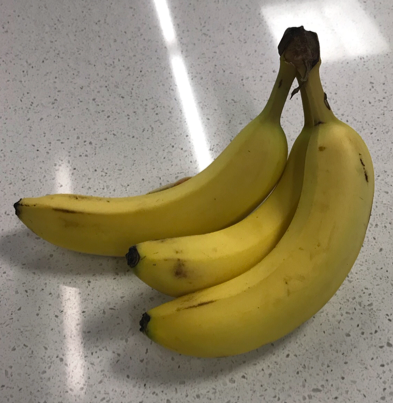

In [13]:
from PIL import Image
Image.open('demo/banana.png')

### 准备模型文件

预训练模型通过配置文件和权重参数文件来定义。配置文件定义了模型结构，权重参数文件保存了训练好的模型参数。

在 GitHub 上 MMCls 通过不同的页面来提供预训练模型。
比如, MobileNetV2 的配置文件和权重参数文件就在这个[链接](https://github.com/open-mmlab/mmclassification/tree/master/configs/mobilenet_v2)下。

我们在安装 mmcls 时就已经将配置文件拿到了本地，但我们还需要手动下载模型权重参数文件。方便起见我们将权重参数文件统一保存到 `checkpoints` 文件夹下. 

In [14]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth -P checkpoints

--2021-07-27 03:22:19--  https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14206911 (14M) [application/octet-stream]
Saving to: ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth’

mobilenet_v2_batch2 100%[===================>]  13.55M  11.0MB/s    in 1.2s    

2021-07-27 03:22:21 (11.0 MB/s) - ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth’ saved [14206911/14206911]



In [15]:
# 检查确保配置文件和参数文件都存在
!ls configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py
!ls checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth

configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py
checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


### 图像分类

MMCls 提供了 high level APIs 用来进行推理计算. 

首先，我们构建模型。

In [16]:
from mmcls.apis import inference_model, init_model, show_result_pyplot

# 指明配置文件和权重参数文件的路径
config_file = 'configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py'
checkpoint_file = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'
# 指明设备，如果你没有开启 GPU，可以使用 CPU， `device='cpu'`.
device = 'cuda:0'
# device = 'cpu'
# 通过配置文件和权重参数文件构建模型
model = init_model(config_file, checkpoint_file, device=device)

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:27: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '


Use load_from_local loader


/content/mmclassification/mmcls/apis/inference.py:44: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [17]:
# 模型的继承关系
model.__class__.__mro__

(mmcls.models.classifiers.image.ImageClassifier,
 mmcls.models.classifiers.base.BaseClassifier,
 mmcv.runner.base_module.BaseModule,
 torch.nn.modules.module.Module,
 object)

In [18]:
# 在单张图片上展示模型的分类效果
img = 'demo/banana.png'
import mmcv
img_array =  mmcv.imread(img)
result = inference_model(model, img_array)
result

{'pred_class': 'banana', 'pred_label': 954, 'pred_score': 0.9999284744262695}

/content/mmclassification/mmcls/models/classifiers/base.py:221: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


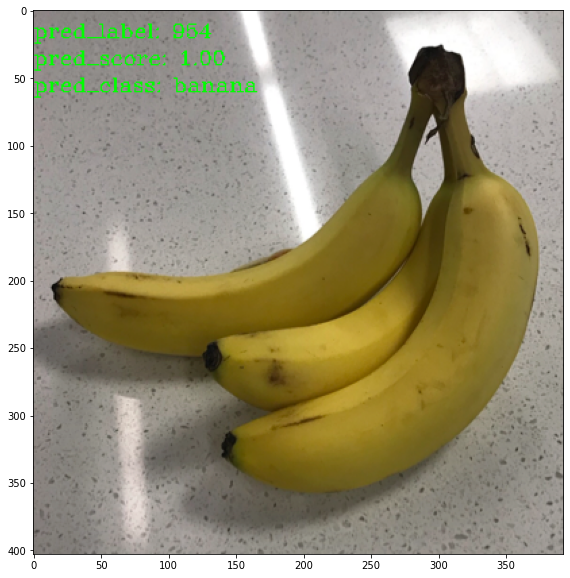

In [19]:
# 可视化分类结果
show_result_pyplot(model, img, result)

## 模型微调

模型微调是将预训练好的模型在特定的数据集上对模型参数进行非常精细调整的过程，最终让预训练的模型能够适配新的数据集及对应的任务。相比于模型的训练过程，模型微调大大降低了训练的时间，并减少了数据量很小的数据集在训练过程中会出现的过拟合问题。

模型微调的基本步骤如下：

1. 准备新数据集
2. 让数据集能够满足 MMCls 的要求
3. 根据数据集创建配置文件 
4. 进行训练和验证

更多细节可以查看 [文档](https://github.com/open-mmlab/mmclassification/blob/master/docs/tutorials/new_dataset.md).

### 准备数据集并满足 MMCls 的要求

这里我们下载猫狗分类数据集，详细过程过程参考 MMClassification 教程

In [20]:
# 下载分类数据集文件
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir data
!unzip -q cats_dogs_dataset.zip -d ./data/

--2021-07-27 03:22:41--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2021-07-27 03:22:41--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4542ecde226f32d4315b1fbc8.dl.dropboxusercontent.com/cd/0/inline/BTGvHQfXo4i1Zuda0OfZIn3M0sLD9saAggO_ol8huDdBTN96R7KGhRMvQ1Qt7efcr-jQjKGu0jIht-yFUenpW8NxVNOfLZgAixsh7Of02gUkBZRBzOZkRTw9ZlePKnWLBFLX72WtD04FdxKOt4xG8Jp6/file# [following]
--2021-07-27 03:22:41--  https://ucb4542ecde226f32d4315b1fbc8.dl.dropboxusercontent.com/cd/0/inline/BTGvHQfXo4i1Zuda0OfZIn3M0sLD9saAggO_ol8

### 根据数据集创建配置文件

详细过程说明参考 MMClassification 教程，这里我们直接配置好微调的配置文件。

In [21]:
# 载入已经存在的配置文件
from mmcv import Config
cfg = Config.fromfile('configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py')

# 修改模型分类头中的类别数目
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1, )

# 加载预训练权重
cfg.model.backbone.init_cfg = dict(type='Pretrained', checkpoint='checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', prefix='backbone')

# 根据你的电脑情况设置 sample size 和 workers 
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu = 2

# 指定训练集路径
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'

# 指定验证集路径
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'

# 指定测试集路径
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'

# 设定数据集归一化参数
normalize_cfg = dict(type='Normalize', mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)
cfg.data.train.pipeline[3] = normalize_cfg
cfg.data.val.pipeline[3] = normalize_cfg
cfg.data.test.pipeline[3] = normalize_cfg

# 修改评价指标选项
cfg.evaluation['metric_options']={'topk': (1, )}

# 设置优化器
cfg.optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)

# 设置学习率策略
cfg.lr_config = dict(policy='step', step=[1])
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# 设置工作目录以保存模型和日志
cfg.work_dir = './work_dirs/cats_dogs_dataset'

from mmcls.apis import set_random_seed
# 设置随机种子，并启用 cudnn 确定性选项以保证结果的可重复性
cfg.seed = 0
set_random_seed(0, deterministic=True)

cfg.gpu_ids = range(1)

### 模型微调

基于我们修改的配置文件，开始对我们的数据集进行模型微调计算。 我们调用 `train_model` API 进行计算. 

In [22]:
import time
import mmcv
import os.path as osp

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# 创建工作目录
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# 创建分类器
model = build_classifier(cfg.model)
model.init_weights()
# 创建数据集
datasets = [build_dataset(cfg.data.train)]
# 添加类别属性以方便可视化
model.CLASSES = datasets[0].CLASSES
# 开始微调
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2021-07-27 03:22:48,408 - mmcv - INFO - load backbone in model from: checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
2021-07-27 03:22:48,497 - mmcls - INFO - Start running, host: root@2fbef59c1bbe, work_dir: /content/mmclassification/work_dirs/cats_dogs_dataset
2021-07-27 03:22:48,499 - mmcls - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHo

Use load_from_local loader


2021-07-27 03:23:07,686 - mmcls - INFO - Epoch [1][100/201]	lr: 1.000e-02, eta: 0:00:57, time: 0.191, data_time: 0.108, memory: 1709, loss: 0.7473
2021-07-27 03:23:24,069 - mmcls - INFO - Epoch [1][200/201]	lr: 1.000e-02, eta: 0:00:35, time: 0.164, data_time: 0.077, memory: 1709, loss: 0.4259
2021-07-27 03:23:24,098 - mmcls - INFO - Saving checkpoint at 1 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 141.2 task/s, elapsed: 11s, ETA:     0s

2021-07-27 03:23:35,521 - mmcls - INFO - Epoch(val) [1][51]	accuracy_top-1: 91.0056
2021-07-27 03:23:55,139 - mmcls - INFO - Epoch [2][100/201]	lr: 1.000e-03, eta: 0:00:18, time: 0.196, data_time: 0.107, memory: 1709, loss: 0.2794
2021-07-27 03:24:12,312 - mmcls - INFO - Epoch [2][200/201]	lr: 1.000e-03, eta: 0:00:00, time: 0.172, data_time: 0.078, memory: 1709, loss: 0.2882
2021-07-27 03:24:12,338 - mmcls - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 145.5 task/s, elapsed: 11s, ETA:     0s

2021-07-27 03:24:23,427 - mmcls - INFO - Epoch(val) [2][51]	accuracy_top-1: 93.6290


/content/mmclassification/mmcls/models/classifiers/base.py:221: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

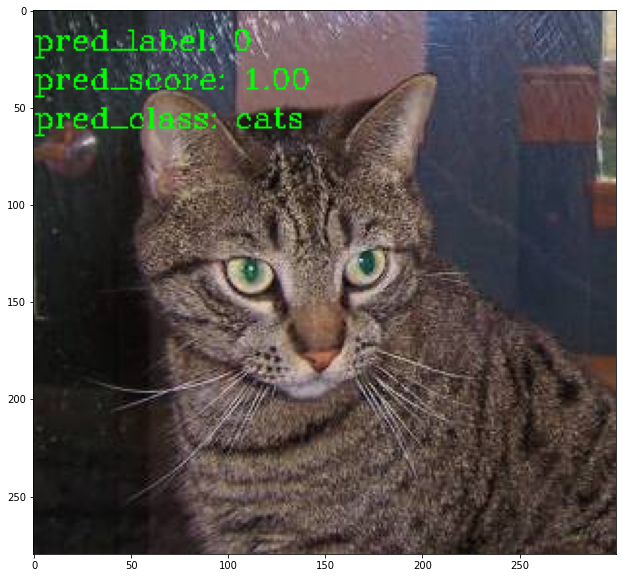

In [23]:
# 验证一下训练好的模型
import matplotlib.pyplot as plt


img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)

plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result)